<a href="https://colab.research.google.com/github/Markushenriksson13/M3-Applied-Deep-Learning-in-AI/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U sentence_transformers --q

In [ ]:
pip install datasets --q


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install sentence-transformers scikit-learn pandas torch


  Using cached sentence_transformers-3.4.1-py3-none-any.whl.metadata (10 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.9 MB/s eta 0:00:00
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached regex-2024.11.6-cp312-cp312-macosx_11_0_arm64.whl.metadata (40 kB)
Using cached sentence_transformers-3.4.1-py3-none-any.whl (275 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 MB 24.7 MB/s eta 0:00:0000:0100:01
Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 35.3 MB/s eta 0:00:0000:0100:01
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
Using cached regex-2024.11.6-cp312-cp312-macosx_11_0_arm64.whl (284 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.9/408.9 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
from datasets import load_dataset, Dataset
import pandas as pd

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
df = load_dataset("NickyNicky/Finance_sentiment_and_topic_classification_En")

# Converting 'train' split to a Pandas DataFrame
df = pd.DataFrame(df['train'])


print(df.head())


df.to_csv("train_data.csv", index=False)


README.md:   0%|          | 0.00/515 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/5.89M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/61199 [00:00<?, ? examples/s]

     answer                                      system_prompt  \
0   neutral  You are a financial sentiment analysis expert....   
1   neutral  You are a financial sentiment analysis expert....   
2  negative  You are a financial sentiment analysis expert....   
3  positive  You are a financial sentiment analysis expert....   
4  positive  You are a financial sentiment analysis expert....   

                                         user_prompt           task_type  
0  According to Gran , the company has no plans t...  sentiment_analysis  
1  Technopolis plans to develop in stages an area...  sentiment_analysis  
2  The international electronic industry company ...  sentiment_analysis  
3  With the new production plant the company woul...  sentiment_analysis  
4  According to the company 's updated strategy f...  sentiment_analysis  


In [ ]:
df.head()

,answer,system_prompt,user_prompt,task_type
0,neutral,You are a financial sentiment analysis expert....,"According to Gran , the company has no plans t...",sentiment_analysis
1,neutral,You are a financial sentiment analysis expert....,Technopolis plans to develop in stages an area...,sentiment_analysis
2,negative,You are a financial sentiment analysis expert....,The international electronic industry company ...,sentiment_analysis
3,positive,You are a financial sentiment analysis expert....,With the new production plant the company woul...,sentiment_analysis
4,positive,You are a financial sentiment analysis expert....,According to the company 's updated strategy f...,sentiment_analysis


In [ ]:
df.drop(['system_prompt', 'task_type'], axis=1, inplace=True)

In [ ]:
df

,answer,user_prompt
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
61194,Treasuries | Corporate Debt,KfW credit line for Uniper could be raised to ...
61195,Treasuries | Corporate Debt,KfW credit line for Uniper could be raised to ...
61196,Treasuries | Corporate Debt,Russian https://t.co/R0iPhyo5p7 sells 1 bln r...
61197,Treasuries | Corporate Debt,Global ESG bond issuance posts H1 dip as supra...


In [ ]:
# only want to keep rows where 'answer' is 'neutral', 'positive', or 'negative'
df_filtered = df[df["answer"].isin(["neutral", "positive", "negative"])]

# Showing the shape of the new DataFrame
print(df_filtered.shape)


(39641, 2)


In [ ]:
df_sampled = df_filtered.sample(frac=0.15, random_state=42)  # 15% sample
print(df_sampled.shape)  # Checking new size


(5946, 2)


<Axes: xlabel='answer', ylabel='count'>

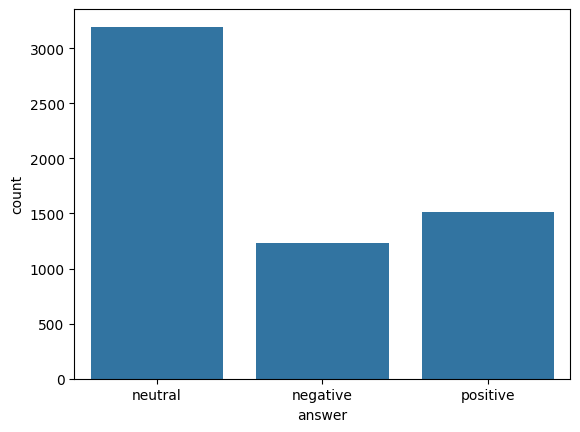

In [ ]:
sns.countplot(x=df_sampled["answer"])

In [ ]:
# Undersampling each class to match the class with the smallest number of samples
min_class_count = df_sampled["answer"].value_counts().min()

# Sampling an equal number of rows from each class
df_balanced = df_sampled.groupby("answer").apply(lambda x: x.sample(min_class_count, random_state=42)).reset_index(drop=True)

# Showing the new class distribution
print(df_balanced["answer"].value_counts())
print(df_balanced.shape)


answer
negative    1236
neutral     1236
positive    1236
Name: count, dtype: int64
(3708, 2)


/var/folders/xc/v1l81vkx6fjc9wpqc0tsnl400000gn/T/ipykernel_11468/1830774783.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df_sampled.groupby("answer").apply(lambda x: x.sample(min_class_count, random_state=42)).reset_index(drop=True)


In [ ]:
# Load model
from sentence_transformers import SentenceTransformer # import the SentenceTransformer class
model = SentenceTransformer("all-MiniLM-L6-v2")

# Converting text to embeddings
X = model.encode(df_balanced["user_prompt"].tolist(), convert_to_numpy=True)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_balanced["answer"])

# Saving the mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)


Label Mapping: {'negative': 0, 'neutral': 1, 'positive': 2}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Load model (already done)
model = SentenceTransformer("all-MiniLM-L6-v2")

# Converting text to embeddings
X = model.encode(df_balanced["user_prompt"].tolist(), convert_to_numpy=True)

# Encode labels (already done)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_balanced["answer"])

# Train-test split (already done)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print classification report to evaluate performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.66      0.52      0.58       277
           1       0.62      0.80      0.70       237
           2       0.55      0.52      0.54       228

    accuracy                           0.61       742
   macro avg       0.61      0.61      0.61       742
weighted avg       0.61      0.61      0.60       742



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
# Print the hyperparameters of the trained model
print("Random Forest Hyperparameters:")
print(f"Number of Estimators (n_estimators): {clf.n_estimators}")
print(f"Max Depth (max_depth): {clf.max_depth}")
print(f"Min Samples Split (min_samples_split): {clf.min_samples_split}")
print(f"Min Samples Leaf (min_samples_leaf): {clf.min_samples_leaf}")
print(f"Random State (random_state): {clf.random_state}")
print(f"Max Features (max_features): {clf.max_features}")



Random Forest Hyperparameters:
Number of Estimators (n_estimators): 200
Max Depth (max_depth): 20
Min Samples Split (min_samples_split): 5
Min Samples Leaf (min_samples_leaf): 1
Random State (random_state): 42
Max Features (max_features): sqrt


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Updated parameters based on your best values
clf = RandomForestClassifier(
    n_estimators=200,          # Set number of trees to 200
    max_depth=20,              # Set max depth to 20
    min_samples_split=5,       # Set min samples split to 5
    random_state=42,           # Keep random state for reproducibility
    max_features='sqrt',       # Default 'sqrt' for Random Forest (best practice)
    min_samples_leaf=1         # Default value is 1, change if needed
)

# Train the model with the new parameters
clf.fit(X_train, y_train)

# You can now use clf for prediction and evaluation as usual


RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.66      0.52      0.58       277
           1       0.62      0.80      0.70       237
           2       0.55      0.52      0.54       228

    accuracy                           0.61       742
   macro avg       0.61      0.61      0.61       742
weighted avg       0.61      0.61      0.60       742



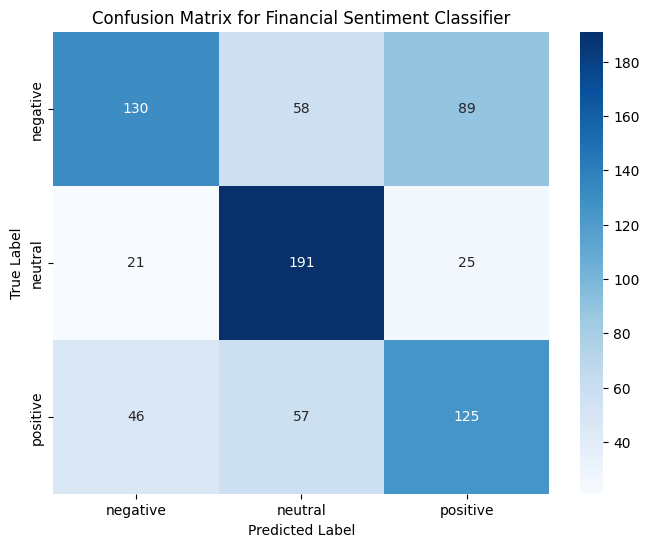

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions on the test data
y_pred = clf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix for Financial Sentiment Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
new_texts = ["The company is doing OK"]
new_embeddings = model.encode(new_texts, convert_to_numpy=True)
predicted_label = clf.predict(new_embeddings)

# Convert back to original label names
decoded_label = label_encoder.inverse_transform(predicted_label)
print("Predicted Label:", decoded_label[0])


Predicted Label: neutral


In [ ]:
# Save SBERT model


# Save RandomForest model
import joblib
joblib.dump(clf, "random_forest_classifier.pkl")  # Save the trained classifier model


['random_forest_classifier.pkl']

In [ ]:
!pip install transformers datasets huggingface_hub




huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
